In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [2]:
# Function to read the CSV file and create a NetworkX graph
def read_graph_from_csv(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            source = row['source']
            target = row['target']
            relationship = row['relationship']
            G.add_edge(source, target, relationship=relationship)
    return G

In [6]:
# Function to visualize the graph with the first style
def visualize_graph_style1(G):
    pos = nx.spring_layout(G, seed=42)  # Custom seed for reproducibility
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    node_colors = ['skyblue' if n not in ['Frank', 'Grace'] else 'salmon' for n in G.nodes()]  # Highlight spouses

    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title("Graph Visualization - Style 1")
    plt.axis('off')  # Hide axis
    plt.show()

In [7]:
# Function to visualize the graph with the second style
def visualize_graph_style2(G):
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=800, node_color='lightgreen', edge_color='blue', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Graph Visualization - Style 2")
    plt.show()

In [10]:
# Function to visualize the graph with node size based on degree centrality
def visualize_degree_centrality(G):
    degree_centrality = nx.degree_centrality(G)
    node_size = [v * 1000 for v in degree_centrality.values()]  # Scale node size based on degree centrality
    
    pos = nx.spring_layout(G, seed=42)  # Custom seed for reproducibility
    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', edge_color='gray', font_size=10)
    plt.title("Graph Visualization - Degree Centrality")
    plt.show()

In [11]:
# Function to visualize the graph with node color based on community detection
def visualize_community_detection(G):
    communities = nx.algorithms.community.greedy_modularity_communities(G)
    node_colors = [0] * len(G.nodes())  # Initialize node colors
    
    for i, community in enumerate(communities):
        for node in community:
            node_colors[list(G.nodes()).index(node)] = i  # Assign color index to nodes in the community
    
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(communities)), edge_color='gray', font_size=10)
    plt.title("Graph Visualization - Community Detection")
    plt.show()

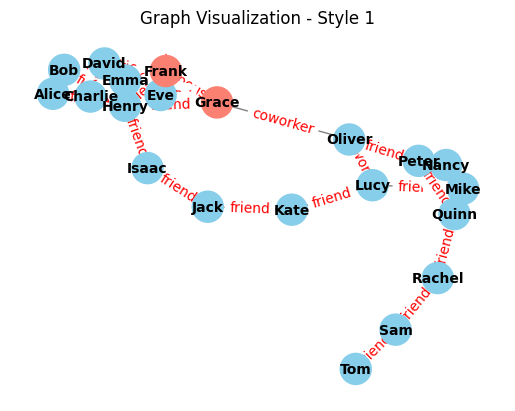

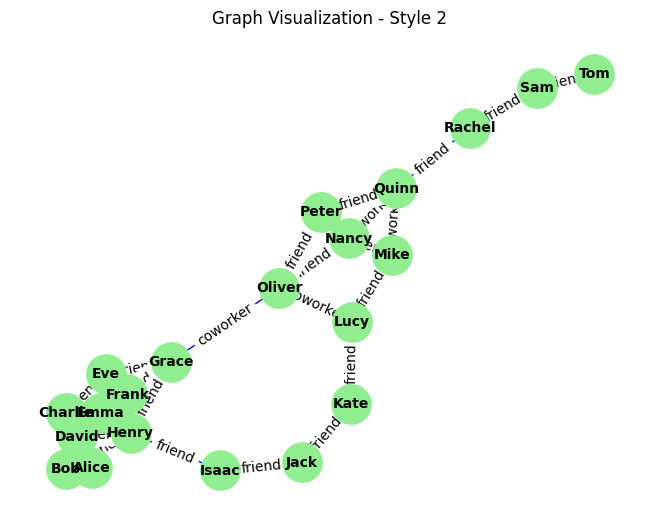

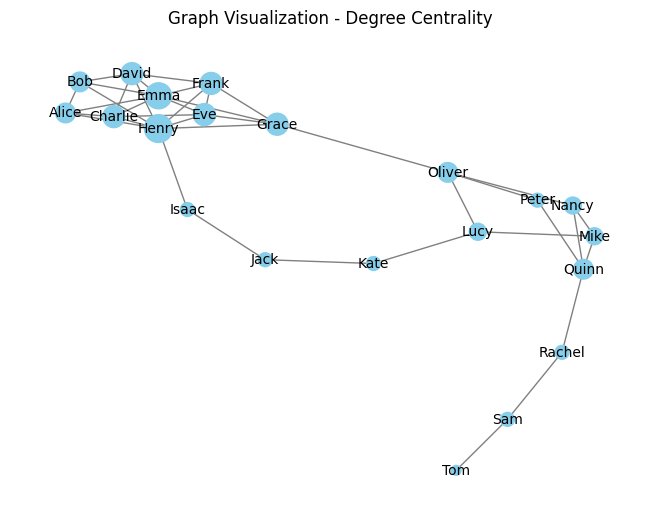

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17268\1882186092.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(communities)), edge_color='gray', font_size=10)


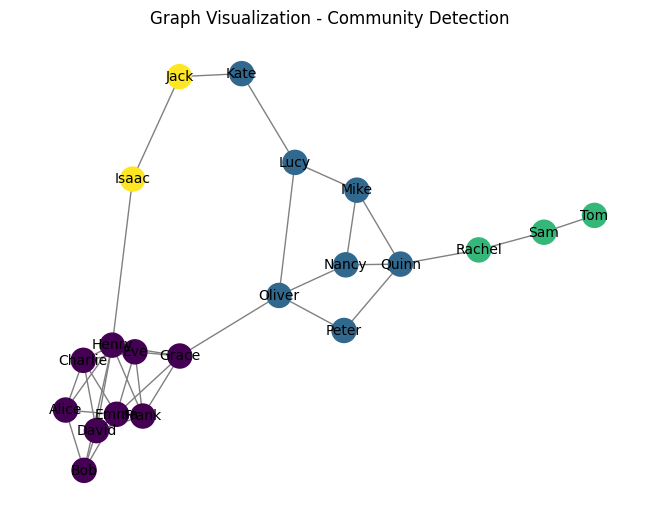

In [12]:
# File path of the CSV file
file_path = '../Databases/graphDB.csv'

# Read the graph from CSV file
graph = read_graph_from_csv(file_path)

# Visualize the graph with the first style
visualize_graph_style1(graph)

# Visualize the graph with the second style
visualize_graph_style2(graph)
# Visualize the graph with node size based on degree centrality
visualize_degree_centrality(graph)

# Visualize the graph with node color based on community detection
visualize_community_detection(graph)